<a href="https://colab.research.google.com/github/vadlamani-s/Schneider/blob/main/LanguageTranslationSch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fasttext

     |████████████████████████████████| 71kB 5.2MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3040770 sha256=3422d64f0632d8b58b4f5d5a3302a7cefb6319a19f740e08745061c136490c11
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [1]:
import string
import re
from numpy import array, argmax, random, take
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras import optimizers
from keras import initializers
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import zeros
from numpy import asarray
import fasttext.util
from collections import Counter
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping


#Package for Language Identification


In [3]:
!wget https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin

--2020-11-23 21:23:13--  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131266198 (125M) [application/octet-stream]
Saving to: ‘lid.176.bin’

lid.176.bin         100%[===================>] 125.18M  50.5MB/s    in 2.5s    

2020-11-23 21:23:16 (50.5 MB/s) - ‘lid.176.bin’ saved [131266198/131266198]



#French and Haitain Word Embedding

In [2]:
#fasttext.util.download_model('fr', if_exists='ignore')
ft = fasttext.load_model('cc.fr.300.bin')

In [3]:
#fasttext.util.download_model('ht', if_exists='ignore')
ft_ht = fasttext.load_model('cc.ht.300.bin')

#Language Identification

In [4]:
pretrained_lang_model = "lid.176.bin"
model_language = fasttext.load_model(pretrained_lang_model)

In [5]:
def reading_to_dataframe(file):
  df = pd.read_csv(file)
  df = df.iloc[:,2:4].dropna()
  df.reset_index(inplace=True, drop = True)
  df['message'] = df['message'].str.lower()
  df['original'] = df['original'].str.lower()
  return df

In [6]:
train_path = "/content/disaster_response_messages_training.csv"
validation_path = "/content/disaster_response_messages_validation.csv"
test_path = "/content/disaster_response_messages_test.csv"
df_train = reading_to_dataframe(train_path)
df_validation = reading_to_dataframe(validation_path)
df_test = reading_to_dataframe(test_path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [7]:
df = reading_to_dataframe(train_path)
df = df.append(df_validation)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


#Language Labelling

In [8]:
list_train = list()
for sentence in df_train['original']:
  list_train.append(model_language.predict(sentence, k = 2)[0][0])
print(Counter(list_train))

Counter({'__label__fr': 2312, '__label__tl': 1160, '__label__ht': 972, '__label__en': 881, '__label__la': 213, '__label__ro': 205, '__label__hr': 168, '__label__pl': 158, '__label__es': 150, '__label__tr': 131, '__label__de': 127, '__label__ku': 115, '__label__nl': 109, '__label__pms': 104, '__label__wa': 103, '__label__jv': 91, '__label__eo': 88, '__label__br': 87, '__label__cy': 76, '__label__it': 73, '__label__su': 64, '__label__sq': 55, '__label__vi': 55, '__label__ca': 53, '__label__id': 49, '__label__pt': 46, '__label__sw': 43, '__label__war': 41, '__label__sl': 34, '__label__ms': 24, '__label__no': 23, '__label__hu': 20, '__label__ie': 20, '__label__ceb': 19, '__label__io': 18, '__label__sh': 17, '__label__kw': 16, '__label__fi': 14, '__label__fy': 14, '__label__et': 13, '__label__mg': 12, '__label__mt': 12, '__label__gn': 11, '__label__sr': 11, '__label__sv': 11, '__label__ur': 10, '__label__cs': 10, '__label__eu': 10, '__label__bs': 9, '__label__sc': 7, '__label__cbk': 7, '__l

In [9]:
list_validation = list()
for sentence in df_validation['original']:
  list_validation.append(model_language.predict(sentence, k = 2)[0][0])
print(Counter(list_validation))

Counter({'__label__fr': 287, '__label__tl': 132, '__label__en': 109, '__label__ht': 106, '__label__la': 32, '__label__es': 28, '__label__ro': 24, '__label__tr': 19, '__label__ku': 17, '__label__hr': 16, '__label__pl': 16, '__label__nl': 15, '__label__de': 13, '__label__wa': 13, '__label__it': 11, '__label__su': 11, '__label__sq': 11, '__label__eo': 10, '__label__br': 10, '__label__jv': 9, '__label__pms': 8, '__label__sw': 7, '__label__no': 6, '__label__pt': 6, '__label__id': 5, '__label__sl': 5, '__label__vi': 5, '__label__ca': 5, '__label__kw': 4, '__label__cy': 3, '__label__bcl': 3, '__label__fy': 3, '__label__ms': 3, '__label__cs': 2, '__label__ur': 2, '__label__gl': 2, '__label__eml': 2, '__label__sr': 2, '__label__diq': 2, '__label__so': 1, '__label__mwl': 1, '__label__ceb': 1, '__label__sh': 1, '__label__mg': 1, '__label__cbk': 1, '__label__sc': 1, '__label__gn': 1, '__label__mt': 1, '__label__is': 1, '__label__li': 1, '__label__ilo': 1, '__label__war': 1, '__label__fi': 1, '__la

In [10]:
list_test = list()
for sentence in df_test['original']:
  list_test.append(model_language.predict(sentence, k = 2)[0][0])
print(Counter(list_test))

Counter({'__label__fr': 281, '__label__tl': 144, '__label__ht': 129, '__label__en': 98, '__label__la': 37, '__label__es': 30, '__label__ro': 25, '__label__hr': 24, '__label__de': 20, '__label__nl': 19, '__label__ku': 14, '__label__br': 14, '__label__pms': 12, '__label__wa': 11, '__label__eo': 11, '__label__su': 11, '__label__pl': 10, '__label__ca': 10, '__label__jv': 9, '__label__tr': 8, '__label__war': 7, '__label__sq': 7, '__label__it': 6, '__label__sw': 5, '__label__id': 5, '__label__vi': 4, '__label__sl': 4, '__label__cy': 4, '__label__ms': 3, '__label__ceb': 3, '__label__oc': 3, '__label__ie': 3, '__label__no': 3, '__label__fi': 3, '__label__gu': 2, '__label__gv': 2, '__label__pt': 2, '__label__gn': 2, '__label__eu': 2, '__label__hu': 2, '__label__fy': 1, '__label__ilo': 1, '__label__tk': 1, '__label__sh': 1, '__label__mg': 1, '__label__sco': 1, '__label__yo': 1, '__label__nds': 1, '__label__bs': 1, '__label__lmo': 1, '__label__mt': 1, '__label__mrj': 1, '__label__qu': 1, '__label

Since, the highest number of sentences in the training, validation and test set are in the French and Haitian language, I used the pre trained French and Haitian embedding from fasttext library.

Adding the labels to the Dataframe

In [177]:
df_train['label'] = list_train
df_validation['label'] = list_validation
df_test['label'] = list_test

Removed all the other languages from training, validation and test sets apart from French and Haitain.

In [12]:
df_train = df_train[(df_train['label'] == "__label__fr") | (df_train['label'] == "__label__tl")]
df_train.reset_index(inplace=True, drop = True)
df_validation = df_validation[(df_validation['label'] == "__label__fr") | (df_validation['label'] == "__label__tl")]
df_validation.reset_index(inplace=True, drop = True)
df_test = df_test[(df_test['label'] == "__label__fr") | (df_test['label'] == "__label__tl")]
df_test.reset_index(inplace=True, drop = True)

In [13]:
df = df_train
df = df.append(df_validation)
df.reset_index(inplace=True, drop=True)

#Tokenization of the Data using Keras, removing all the punctuations
---

In [14]:
def tokenization(lines):
  tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
  tokenizer.fit_on_texts(lines)
  return tokenizer

In [15]:
tokenizer_message_train = tokenization(df['message'])
tokenizer_original_train = tokenization(df['original'])

In [16]:
vocabulary_size_original = len(tokenizer_original_train.word_index) + 1
vocabulary_size_message = len(tokenizer_message_train.word_index) + 1
max_original_sent_length = df['message'].str.split().str.len().max()
max_message_sent_length = df['original'].str.split().str.len().max()

In [17]:
print("Max vocabulary length of multi-lingual data :", vocabulary_size_original)
print("Max vocabulary length of english data :", vocabulary_size_message)
print("Max sentence length of multi-lingual data :", max_original_sent_length)
print("Max sentence length of english data :", max_message_sent_length)

Max vocabulary length of multi-lingual data : 9222
Max vocabulary length of english data : 5947
Max sentence length of multi-lingual data : 66
Max sentence length of english data : 57


#Encoding sequences and padding with zero's

---

In [18]:
def encode_sequences(tokenizer, max_length, sentences):
  seq = tokenizer.texts_to_sequences(sentences)
  seq = pad_sequences(seq, maxlen=max_length, padding='post')
  return seq

In [19]:
encode_message = encode_sequences(tokenizer_message_train, max_message_sent_length, df_train['message'])
encode_original = encode_sequences(tokenizer_original_train, max_original_sent_length, df_train['original'])
encode_message_validate = encode_sequences(tokenizer_message_train, max_message_sent_length, df_validation['message'])
encode_original_validate = encode_sequences(tokenizer_original_train, max_original_sent_length, df_validation['original'])

#Building Embedded Matrix

---



In [25]:
import numpy as np
def create_embedded_matrix(embedding_matrix, tokenizer):
  for word, index in tokenizer.word_index.items():
    embedding_vector = ft.get_word_vector(word)
    if np.all(embedding_vector) == 0:
      embedded_matrix[index] = ft_ht.get_word_vector(word)
      continue
    embedding_matrix[index] = embedding_vector
  return embedding_matrix

In [26]:
embedded_matrix = zeros((vocabulary_size_original, 300))
embedded_matrix = create_embedded_matrix(embedded_matrix, tokenizer_original_train)

In [72]:
embedded_matrix.shape

(9222, 300)

In [ ]:
# Deleting the variables
del ft
del ft_ht

#Building the Model

---

In [165]:
model = Sequential()
embedding_dimension = 300
embedding_layer = Embedding(vocabulary_size_original, embedding_dimension, weights = [embedded_matrix], input_length=max_original_sent_length
                            , trainable = False)

In [159]:
embedding_layer.get_config()

{'activity_regularizer': None,
 'batch_input_shape': (None, 66),
 'dtype': 'float32',
 'embeddings_constraint': None,
 'embeddings_initializer': {'class_name': 'RandomUniform',
  'config': {'maxval': 0.05, 'minval': -0.05, 'seed': None}},
 'embeddings_regularizer': None,
 'input_dim': 9222,
 'input_length': 66,
 'mask_zero': False,
 'name': 'embedding_5',
 'output_dim': 300,
 'trainable': False}

In [166]:
units = 200
model.add(embedding_layer)
model.add(LSTM(units))
model.add(RepeatVector(max_message_sent_length))
model.add(LSTM(units, return_sequences=True))
model.add(Dense(vocabulary_size_message, activation='softmax'))
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

In [167]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 66, 300)           2766600   
_________________________________________________________________
lstm_13 (LSTM)               (None, 200)               400800    
_________________________________________________________________
repeat_vector_6 (RepeatVecto (None, 57, 200)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 57, 200)           320800    
_________________________________________________________________
dense_6 (Dense)              (None, 57, 5947)          1195347   
Total params: 4,683,547
Trainable params: 1,916,947
Non-trainable params: 2,766,600
_________________________________________________________________


In [142]:
# import numpy as np
# count = 0
# weights = model.layers[0].get_weights()[0]
# for i in range(model.layers[0].get_weights()[0].shape[0]):
#   if np.all(weights[i]) == 0:
#     count += 1
# print(count)

3


In [168]:
filename = 'model_new.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
earlystopping = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience = 20)

In [169]:
history = model.fit(encode_original, encode_message.reshape(encode_message.shape[0], encode_message.shape[1], 1),
                    batch_size=64, validation_data=(encode_original_validate, encode_message_validate),
        verbose = 1, callbacks = [checkpoint, earlystopping], epochs = 100)

Epoch 1/100
54/55 [============================>.] - ETA: 0s - loss: 2.9261
Epoch 00001: val_loss improved from inf to 2.25673, saving model to model_new.h5
55/55 [==============================] - 4s 66ms/step - loss: 2.9233 - val_loss: 2.2567
Epoch 2/100
54/55 [============================>.] - ETA: 0s - loss: 2.1964
Epoch 00002: val_loss improved from 2.25673 to 2.19951, saving model to model_new.h5
55/55 [==============================] - 3s 55ms/step - loss: 2.1953 - val_loss: 2.1995
Epoch 3/100
54/55 [============================>.] - ETA: 0s - loss: 2.1468
Epoch 00003: val_loss did not improve from 2.19951
55/55 [==============================] - 3s 53ms/step - loss: 2.1476 - val_loss: 2.2369
Epoch 4/100
54/55 [============================>.] - ETA: 0s - loss: 2.1225
Epoch 00004: val_loss did not improve from 2.19951
55/55 [==============================] - 3s 53ms/step - loss: 2.1235 - val_loss: 2.2023
Epoch 5/100
54/55 [============================>.] - ETA: 0s - loss: 2.1047


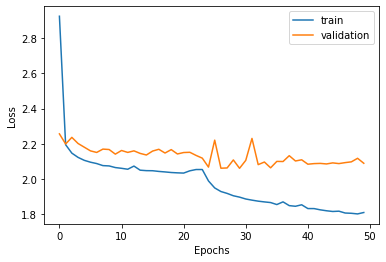

In [170]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.show()

In [171]:
model = load_model(filename)

In [172]:
prediction = model.predict_classes(encode_original_validate)

In [173]:
prediction

array([[ 2, 27, 23, ...,  0,  0,  0],
       [ 2, 27, 23, ...,  0,  0,  0],
       [ 2, 27, 23, ...,  0,  0,  0],
       ...,
       [ 2, 27, 23, ...,  0,  0,  0],
       [ 2, 27, 23, ...,  0,  0,  0],
       [ 2, 27, 23, ...,  0,  0,  0]])

In [174]:
def get_word(n, tokenizer):
  for word, index in tokenizer.word_index.items():
    if index == n:
      return word
  return None

predicted_text = []
for line in prediction:
  temp = []
  for num in range(len(line)):
    word = get_word(line[num], tokenizer_message_train)
    if num > 0:
      if (word == get_word(line[num-1], tokenizer_message_train)) or (word == None):
        temp.append('')
      else:
        temp.append(word)
    else:
      if (word == None):
        #temp.append('')
        pass
      else:
        temp.append(word) 
  predicted_text.append(' '.join(temp))

In [175]:
predicted_text

['i would like to the                                                    ',
 'i would like to  the                                                   ',
 'i would like to  the                                                   ',
 'i need like to  the                                                   ',
 'i would like to  the                                                   ',
 'i am a to the                                                    ',
 'i am a to the                                                    ',
 'i am a to the                                                    ',
 'i am a to the                                                    ',
 'i would like to  the                                                   ',
 'i would like to  the                                                   ',
 'i would like to  the                                                   ',
 'i am a to the                                                    ',
 'i would like to  the                     